```
Data Analytics project:
-----------------------

(1) Understand the business problem

(2) Data understanding

(3) Data cleaning

(4) Analysis

(5) Presentation

step1:(Business Understanding)
------

==> Restaurant owner wants detailed report on sales

==> whatever, They have provided, from that do analysis and submit your report/inference

step2:( Data Understanding)
------

==> After business understanding, the next immediate thing was ETL

	E = Extract the data from DB

	T = Transform(Power BI | Tableau)

	L = load the data
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


```
point to remember:
------------------

==> Immediate step after loading the data is dataset understanding

==> understand the each and every column very clearly(do research in google)

==> understand the dataset by applying info(), shape, dtypes

==> categorize the data as continuous, discrete categorical, discrete count

==> observe the data inside each column
```

In [63]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [64]:
df.rename(columns={'sex': 'gender', 'size': 'no_of_members'}, inplace=True)
df.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time',
       'no_of_members'],
      dtype='object')

In [6]:
continuous = ['total_bill', 'tip']
discrete_categorical = ['gender', 'smoker', 'day', 'time']
discrete_count = ['no_of_members']

In [7]:
df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [8]:
df['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [9]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [13]:
df['no_of_members'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [14]:
df[continuous].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [15]:
df[continuous].skew()

total_bill    1.133213
tip           1.465451
dtype: float64

In [16]:
df[discrete_categorical].describe()

,gender,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [17]:
df['gender'].value_counts()

gender
Male      157
Female     87
Name: count, dtype: int64

In [18]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [19]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [20]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [21]:
df.isnull().sum()

total_bill       0
tip              0
gender           0
smoker           0
day              0
time             0
no_of_members    0
dtype: int64

```
plot for continuous variable:
-----------------------------

(1) histplot  (univariant)

(2) boxplot   (univariant)

(3) scatterplot   (bivariant)

(4) lineplot  (bivariant)

(5) jointplot (bivariant)

(6) violinplot(bivariant)

(7) pairplot  (multivariant)

(8) heatmap   (multivariant)
```

### ***Histogram***

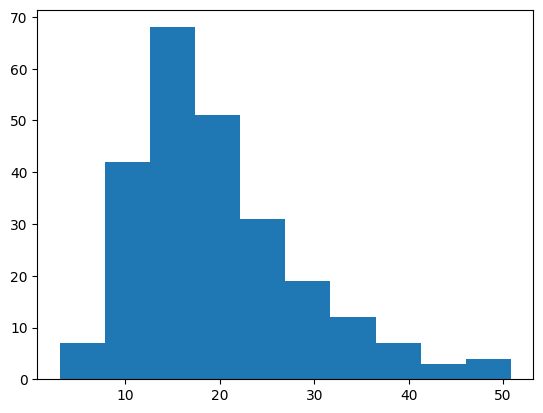

In [22]:
plt.hist(df['total_bill'], bins=10)
plt.show()

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


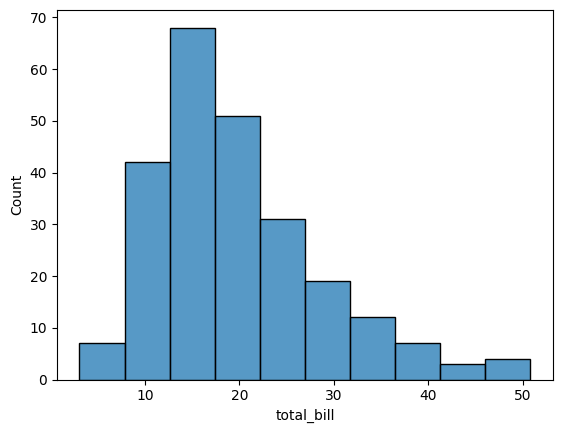

In [23]:
sns.histplot(df['total_bill'], bins=10)
plt.show()

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


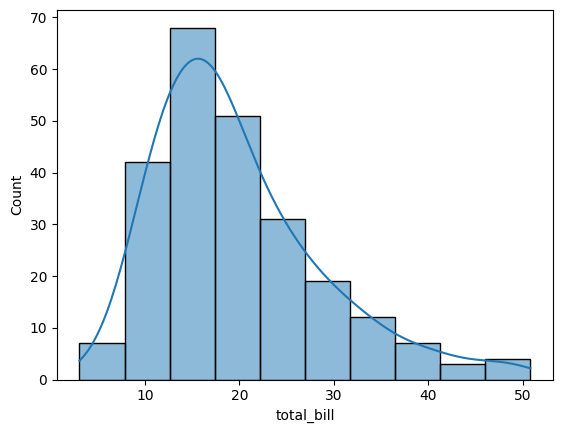

In [24]:
sns.histplot(df['total_bill'], bins=10, kde=True)
plt.show()

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


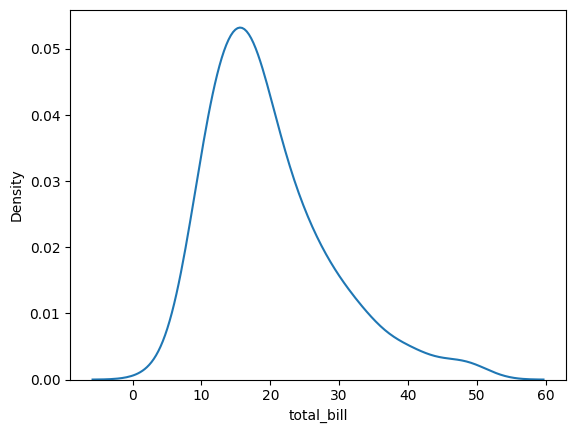

In [25]:
sns.kdeplot(df['total_bill'])
plt.show()

### ***boxplot***

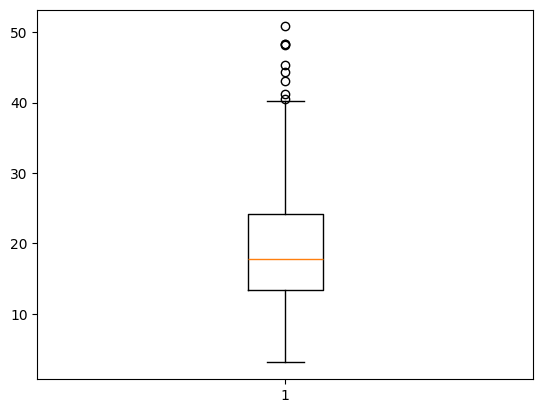

In [26]:
plt.boxplot(df['total_bill'])
plt.show()

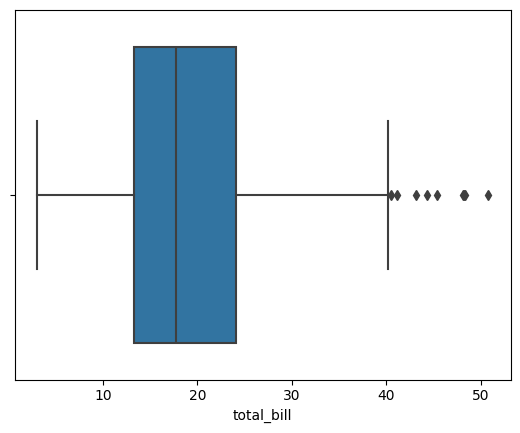

In [27]:
sns.boxplot(x=df['total_bill'])
plt.show()

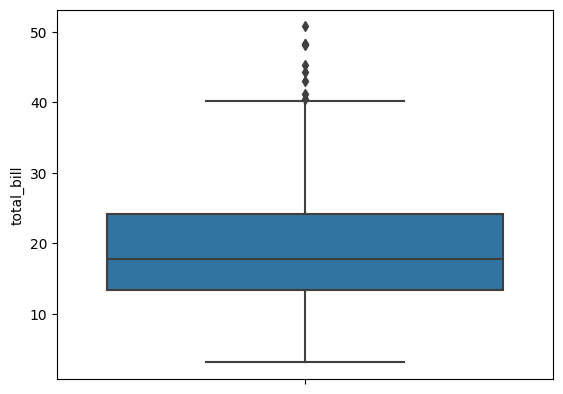

In [28]:
sns.boxplot(y=df['total_bill'])
plt.show()

### ***Scatterplot***

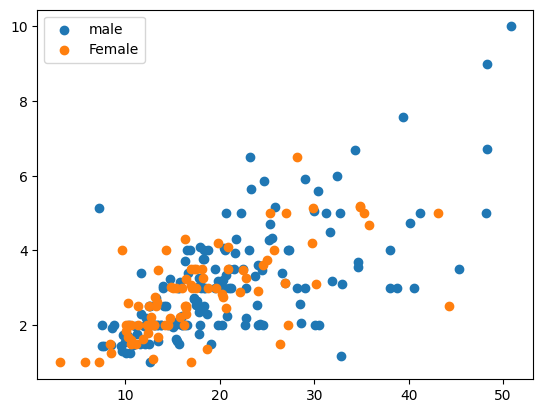

In [29]:
male = df[df['gender'] == "Male"]
female = df[df['gender'] == "Female"]

plt.scatter(x= male['total_bill'], y= male['tip'], label='male')
plt.scatter(x= female['total_bill'], y= female['tip'], label='Female')
plt.legend()
plt.show()

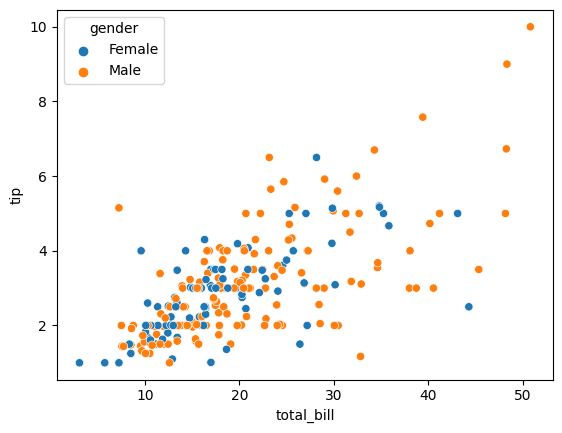

In [30]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['gender'])
plt.show()

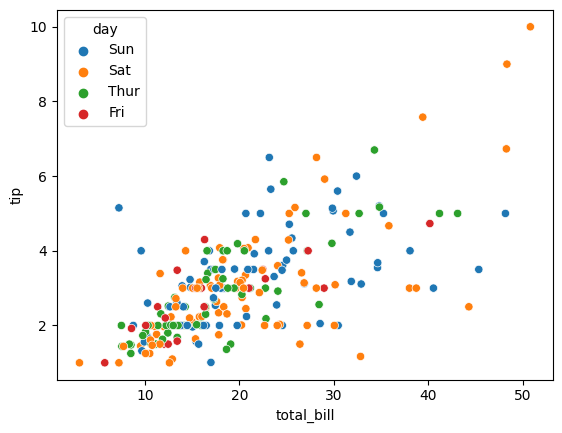

In [31]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['day'])
plt.show()

AttributeError: PathCollection.set() got an unexpected keyword argument 'col'

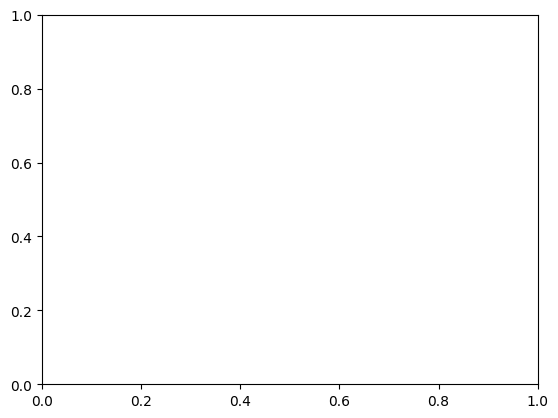

In [32]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], col=df['day'])
plt.show()

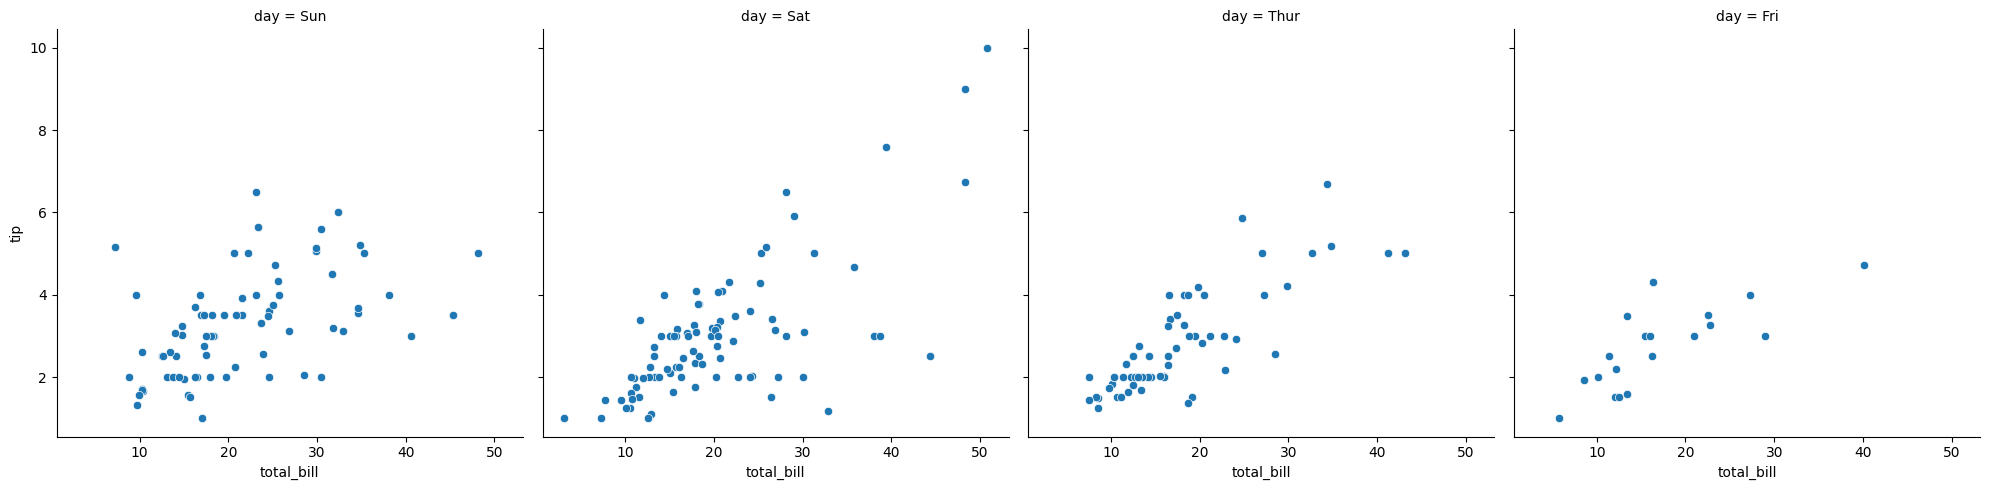

In [33]:
sns.relplot(x=df['total_bill'], y=df['tip'], col=df['day'])
plt.show()

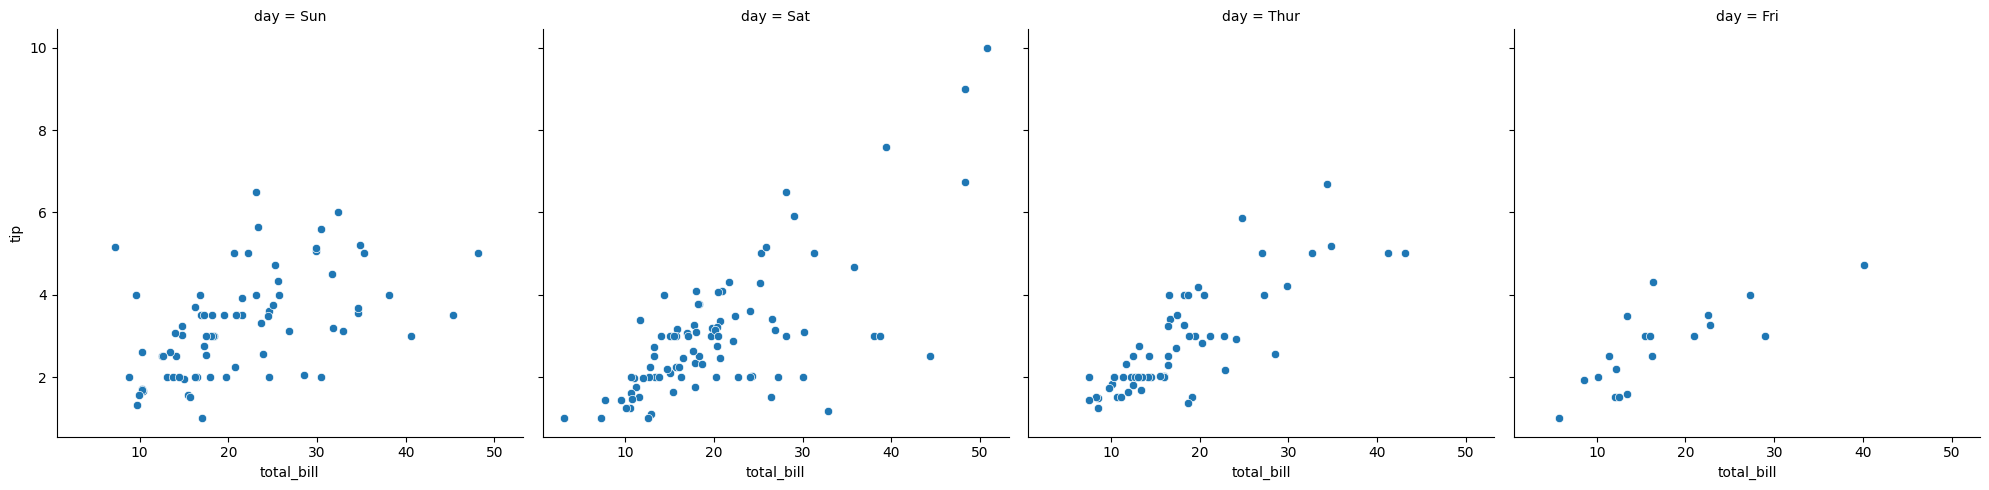

In [34]:
sns.relplot(x=df['total_bill'], y=df['tip'], col=df['day'], col_wrap=4)
plt.show()

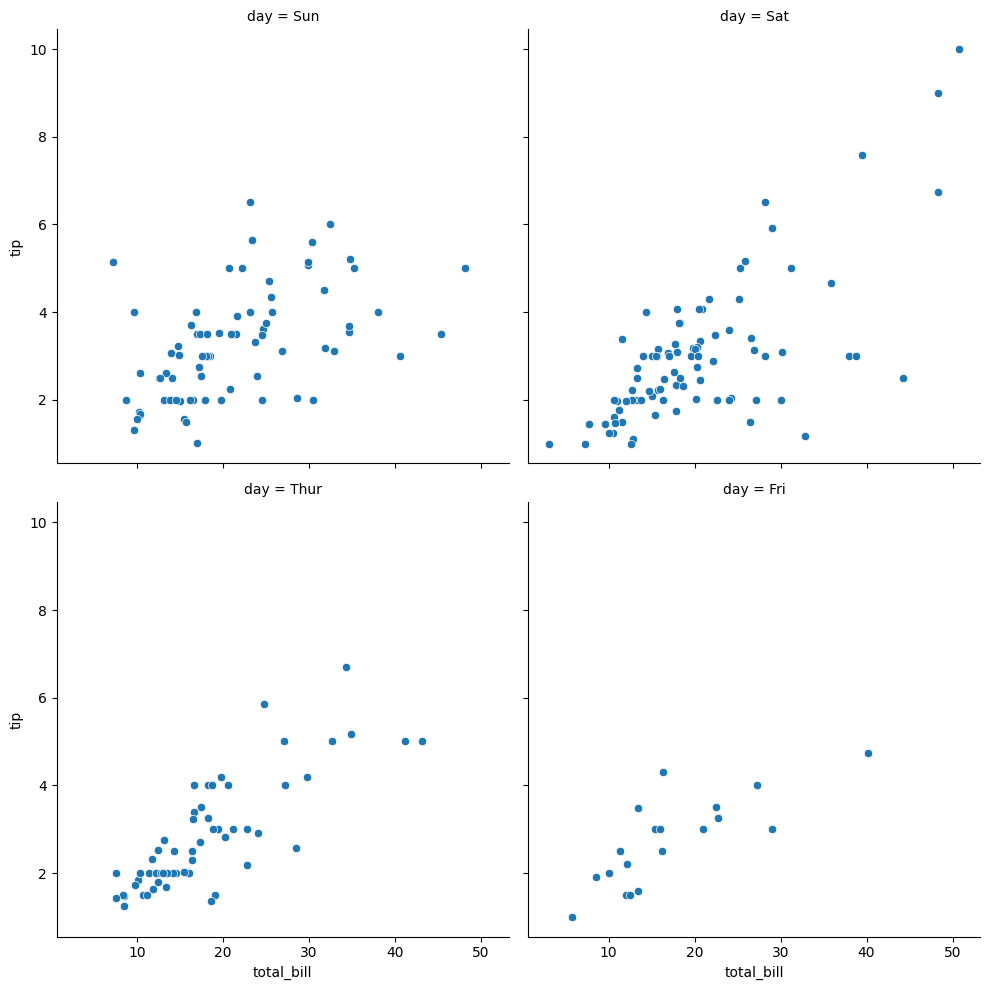

In [35]:
sns.relplot(x=df['total_bill'], y=df['tip'], col=df['day'], col_wrap=2)
plt.show()

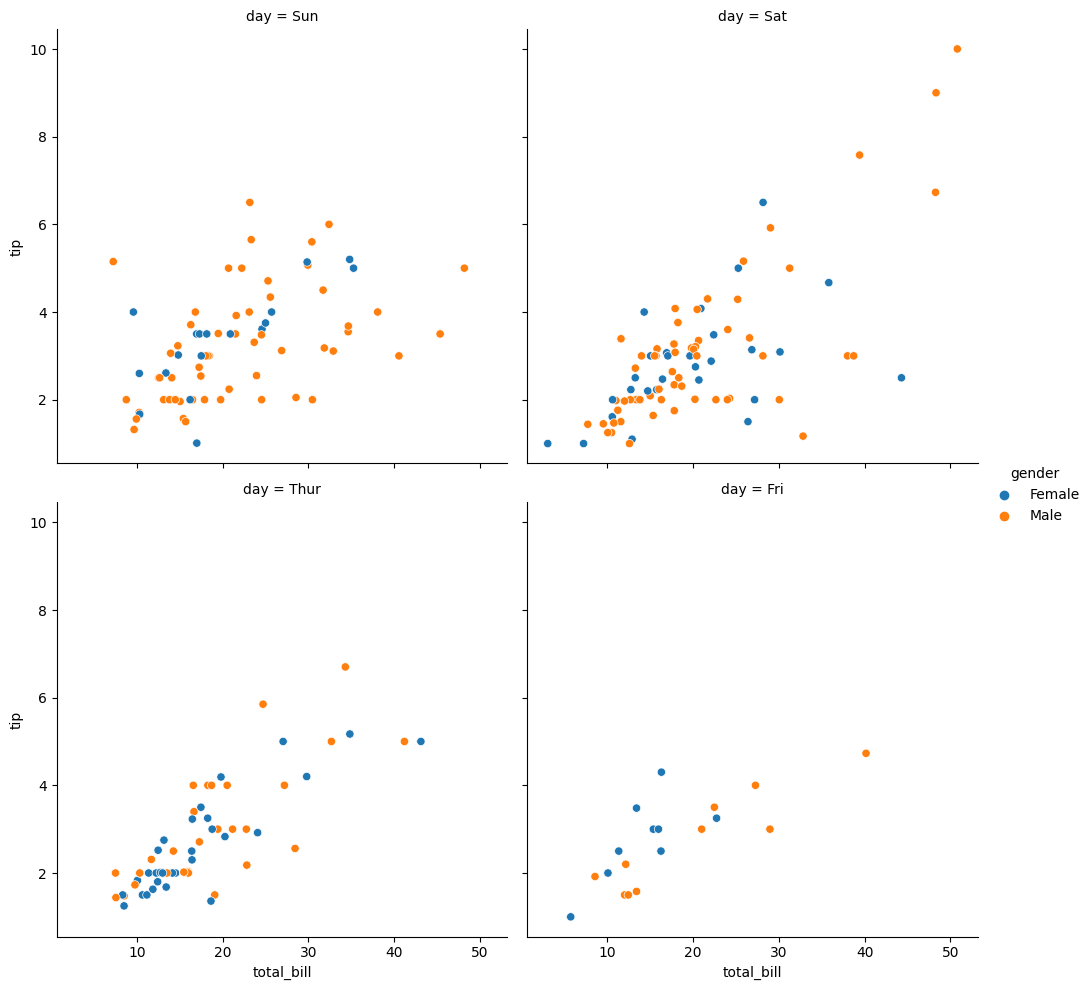

In [36]:
sns.relplot(x=df['total_bill'], y=df['tip'], col=df['day'], col_wrap=2, hue=df['gender'])
plt.show()

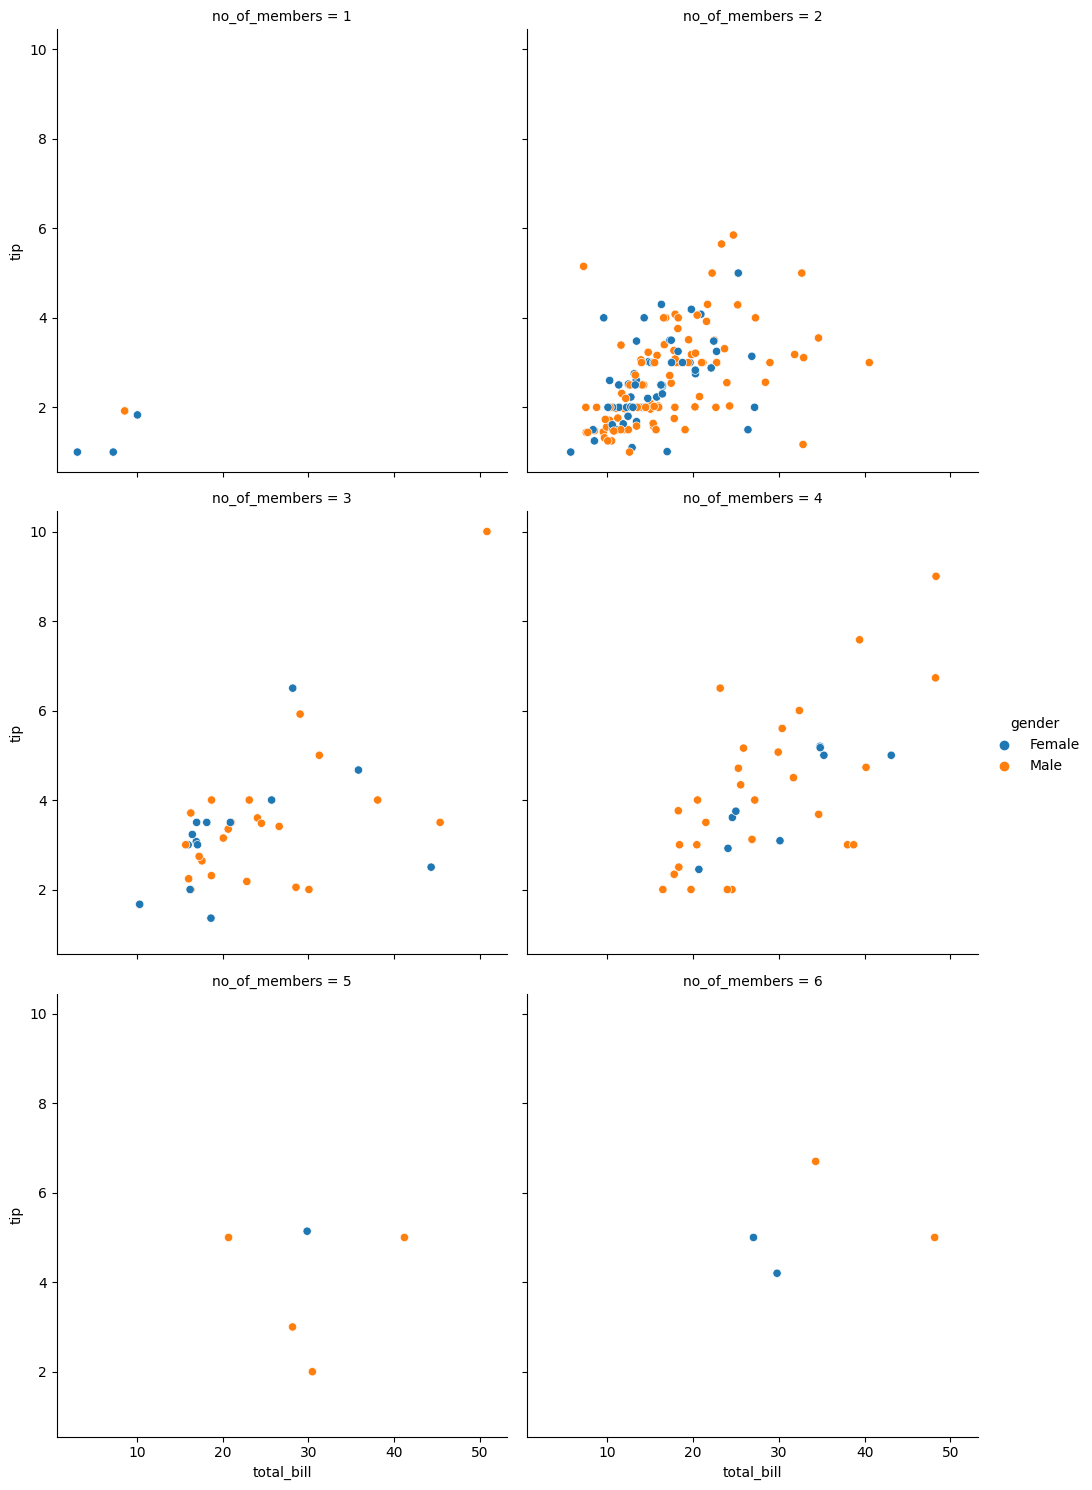

In [37]:
sns.relplot(x=df['total_bill'], y=df['tip'], col=df['no_of_members'], col_wrap=2, hue=df['gender'])
plt.show()

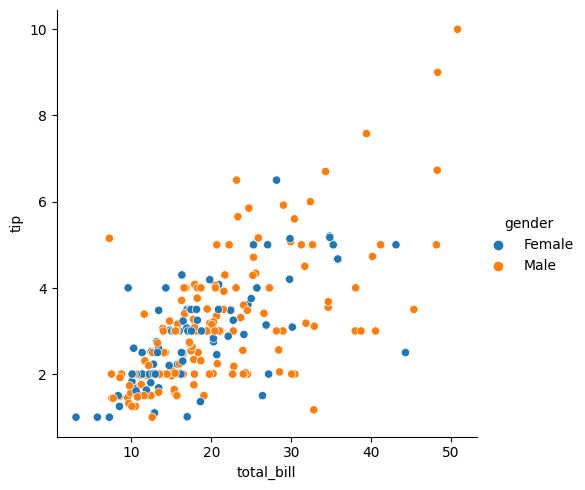

In [38]:
sns.relplot(x=df['total_bill'], y=df['tip'], hue=df['gender'])
plt.show()

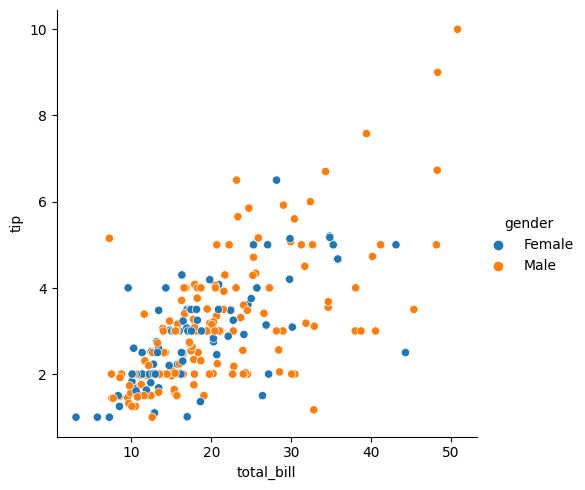

In [39]:
sns.relplot(x='total_bill', y='tip', data=df, hue='gender')
plt.show()

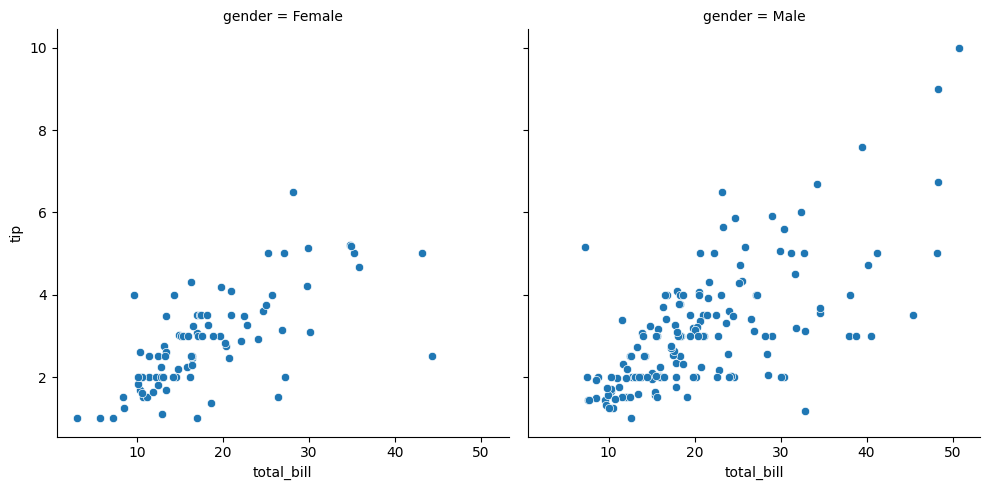

In [40]:
sns.relplot(x='total_bill', y='tip', data=df, col='gender')
plt.show()

### ***Lineplot***

In [41]:
df['sno'] = pd.DataFrame(np.arange(1,245))
df

,total_bill,tip,gender,smoker,day,time,no_of_members,sno
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,3
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,5
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,240
240,27.18,2.00,Female,Yes,Sat,Dinner,2,241
241,22.67,2.00,Male,Yes,Sat,Dinner,2,242
242,17.82,1.75,Male,No,Sat,Dinner,2,243


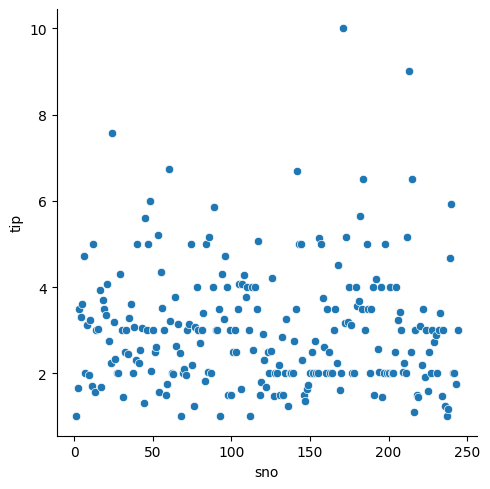

In [43]:
sns.relplot(x='sno', y='tip', data=df)
plt.show()

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


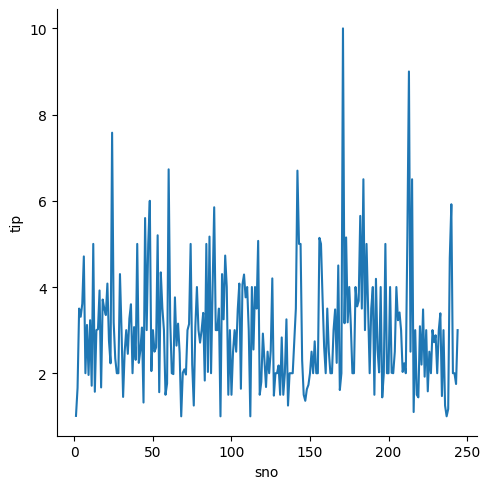

In [42]:
sns.relplot(x='sno', y='tip', kind='line', data=df)
plt.show()

In [44]:
df.drop("sno", axis=1, inplace=True)

In [45]:
df.head()

,total_bill,tip,gender,smoker,day,time,no_of_members
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### ***Jointplot***

```
It allows you study the relationship between 2 numeric variable. The central chart display their correlation. It is usually a scatterplot, a hexbin plot, 2D histogram, 2D density plot
```

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


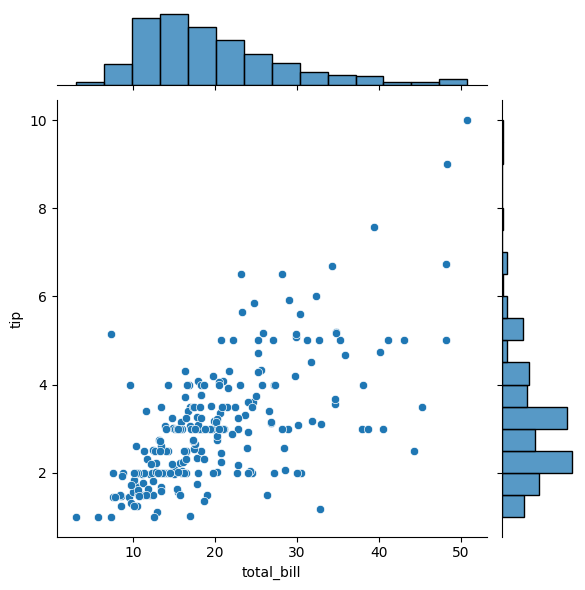

In [46]:
sns.jointplot(x='total_bill', y='tip', data=df)
plt.show()

### ***Violinplot***
```
violin plot help us to see both the distribution of data in terms of kernel density estimation and the box plot
```

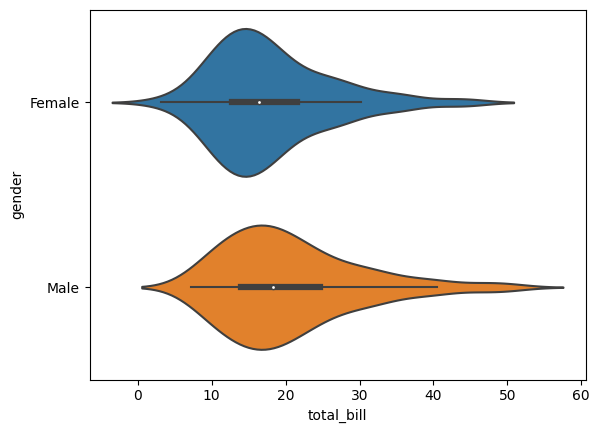

In [47]:
sns.violinplot(x='total_bill', y='gender', data=df)
plt.show()

### ***Pairplot***
```
A pair plot is also known as scatterplot, in which one variable in the same data row is matched with another variable value like this; pair plots are just elaborations on this showing all variables paired with all the other variables
```

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


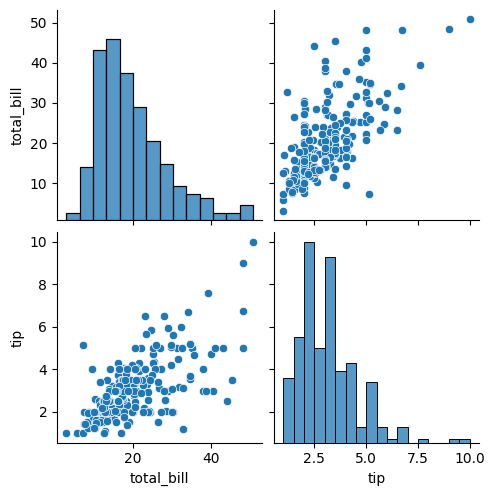

In [48]:
sns.pairplot(df, vars=continuous)
plt.show()

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


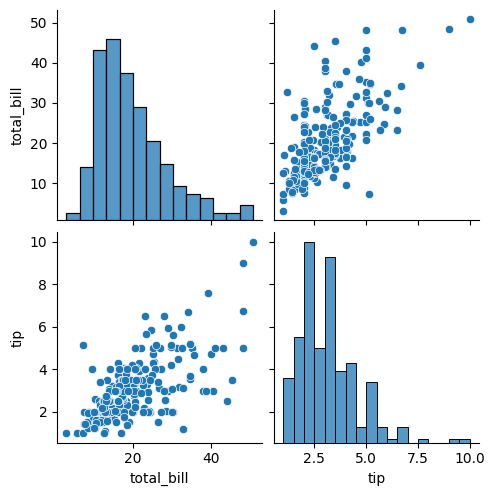

In [49]:
sns.pairplot(df, vars=['total_bill', 'tip'])
plt.show()

### ***Heatmap***

```
HeatMap:
--------

A heatmap uses colored cells to represent relation between variables

Heatmap for correlation:
------------------------

(1) A correlation heatmap uses colored cells to show a 2D correlation matrix table between two numeric dimensions

(2) It is very important in feature selection
```

In [50]:
cm = df[continuous].corr()
cm

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


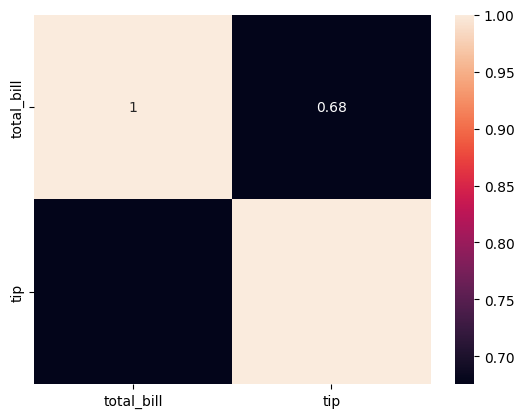

In [51]:
sns.heatmap(cm, annot=True)
plt.show()

```
Group by:
---------

==> It is used to group the discrete variable and continuous variable.
```

In [54]:
gdf = pd.DataFrame({'Gender':['Male','Male','Male','Female','Female'],"total_bill":[20,22,28,10,30]})
gdf

,Gender,total_bill
0,Male,20
1,Male,22
2,Male,28
3,Female,10
4,Female,30


In [55]:
male   = gdf[gdf['Gender']=='Male']
female = gdf[gdf['Gender']=='Female']
print(male['total_bill'].mean())
print(female['total_bill'].mean())

23.333333333333332
20.0


In [56]:
gdf.groupby('Gender')['total_bill'].mean()

Gender
Female    20.000000
Male      23.333333
Name: total_bill, dtype: float64

In [57]:
gdf.groupby('Gender')['total_bill'].min()

Gender
Female    10
Male      20
Name: total_bill, dtype: int64

In [58]:
gdf.groupby('Gender')['total_bill'].max()

Gender
Female    30
Male      28
Name: total_bill, dtype: int64

In [66]:
pd.crosstab(df['gender'], df['day'],margins=True)

day,Fri,Sat,Sun,Thur,All
gender,,,,,
Female,9,28,18,32,87
Male,10,59,58,30,157
All,19,87,76,62,244


```
points to remember:
-------------------

(1) Histogram: Frequency distribution on continuous data
    Advantages: (1) where more data lies, for which range of values the count is more
		        (2) Distribution of data

(2) Boxplot: Representation of five number (min,Q1,Q2,Q3,max)
    Advantage:  To check outliers are present or not

(3) scatterplot: Representation of scatter point between two continuous variable.
    Advantage:  (1) observe the direction as x (increases) then y(decrease/increase) ==> cov
		        (2) Strength between two variables (closeness between var)           ==> corr
It can applied on three variable (2 continuous and 1 discrete)

(4) Lineplot: trend line between 2 variables(x-timeseries variable,y-continuous variable)
    Advantage: (1) Observe the trend as time increases, the value increase/decrease.
               (2) comparision between two variables

```

```
plots for discrete variable:
----------------------------

(1) barplot  (univariant)

(2) countplot(univariant)

(3) boxplot  (bivariant)
```

### ***Countplot***

In [67]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [68]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

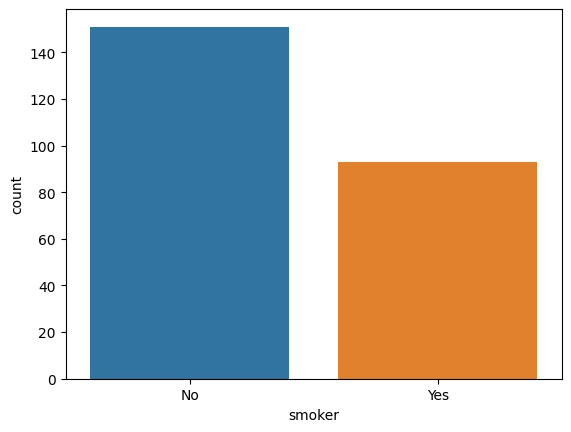

In [69]:
sns.countplot(x=df['smoker'])
plt.show()

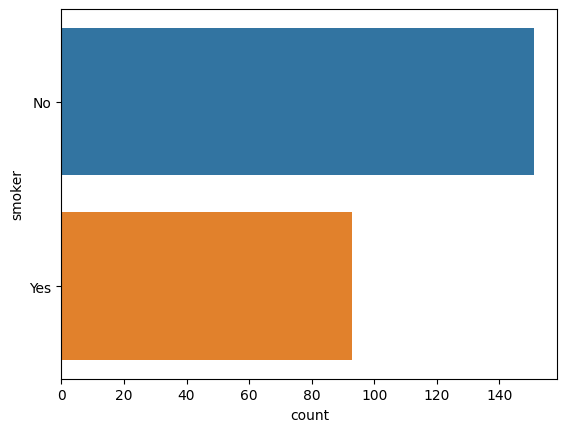

In [70]:
sns.countplot(y=df['smoker'])
plt.show()

### ***Barplot***

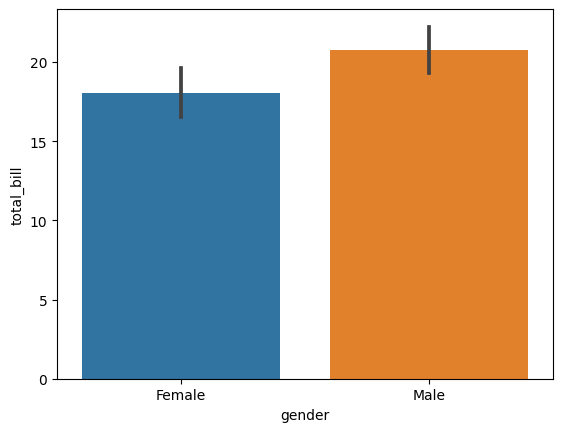

In [71]:
sns.barplot(x='gender', y='total_bill', data=df)
plt.show()

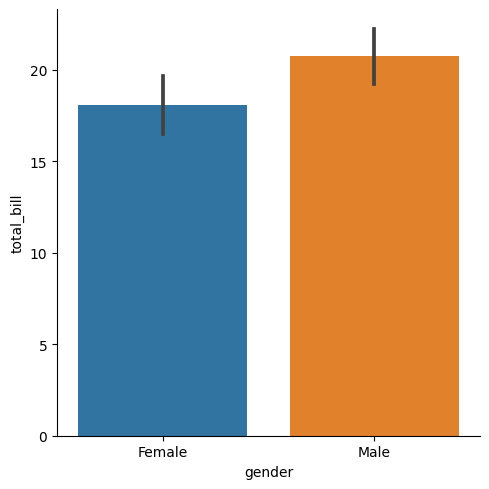

In [73]:
sns.catplot(x='gender',y='total_bill',data=df,kind='bar')
plt.show()

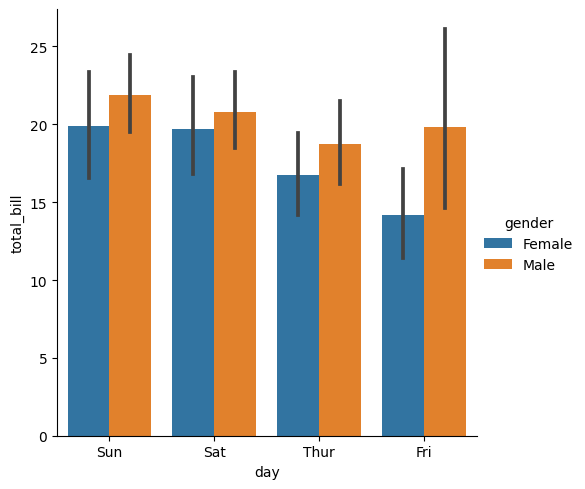

In [74]:
sns.catplot(x='day',y='total_bill',data=df,kind='bar',hue='gender')
plt.show()

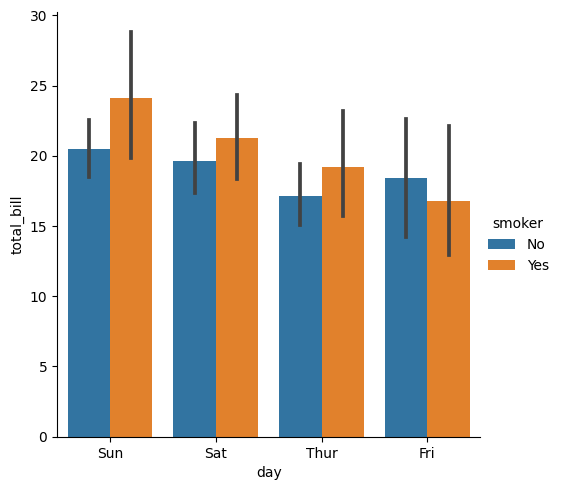

In [75]:
sns.catplot(x='day',y='total_bill',data=df,kind='bar',hue='smoker')
plt.show()

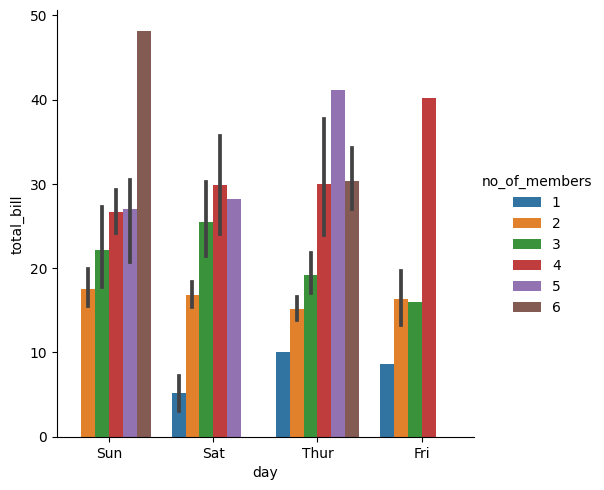

In [77]:
sns.catplot(x='day',y='total_bill',data=df,kind='bar',hue='no_of_members')
plt.show()

### ***Boxplot***

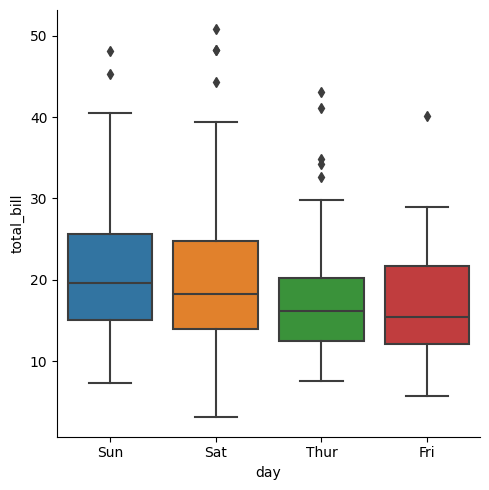

In [78]:
sns.catplot(x='day', y='total_bill', data=df, kind='box')
plt.show()

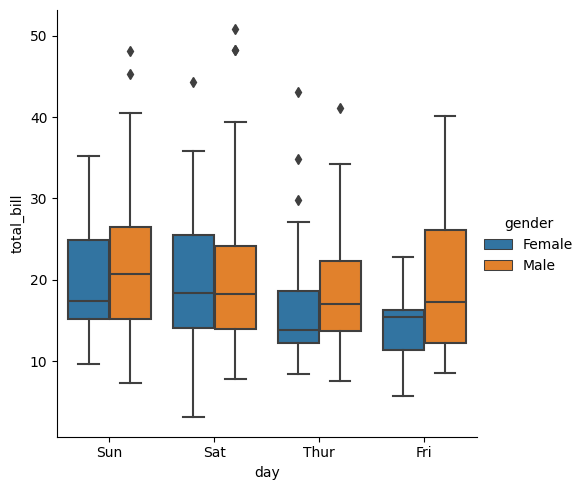

In [79]:
sns.catplot(x='day', y='total_bill', data=df, kind='box', hue='gender')
plt.show()